In [44]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import randrange
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


## Exemplo de uma rede simples
10 neurônios na camada intermediária

In [45]:
model = keras.Sequential(
    [
        layers.Dense(10, input_dim=784, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [46]:
batch_size = 128
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 0.8337 - accuracy: 0.7623 - val_loss: 0.3491 - val_accuracy: 0.9095
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8978 - val_loss: 0.2744 - val_accuracy: 0.9227
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.9106 - val_loss: 0.2519 - val_accuracy: 0.9305
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.9167 - val_loss: 0.2367 - val_accuracy: 0.9342
Epoch 5/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9193 - val_loss: 0.2300 - val_accuracy: 0.9357


In [47]:
def print_loss_accuracy(model):
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
print_loss_accuracy(model)

Test loss: 0.27354589104652405
Test accuracy: 0.9247000217437744


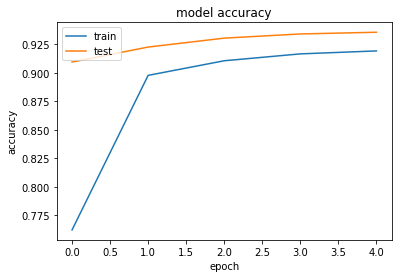

In [48]:
def plot_accuracy_convergence(history):
  # Plotando acurácia ao longo das épocas
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_accuracy_convergence(history)

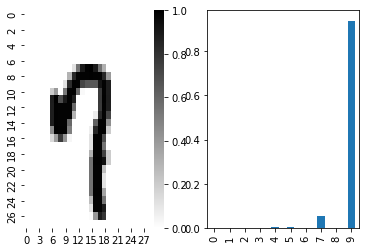

In [49]:
def give_me_some_estimative():
  ii_test = randrange(y_test.shape[0])
  plt.subplot(1, 2, 1)
  sns.heatmap(x_test[ii_test].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)
  plt.subplot(1, 2, 2)
  pd.Series(model.predict(x_test[ii_test].reshape(1, 784))[0]).plot(kind = 'bar')
give_me_some_estimative()

## Exemplo de uma rede (ainda mais) simples
Sem neurônios na camada intermediária

In [50]:

model = keras.Sequential(
    [
        layers.Dense(num_classes, input_dim=784, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [51]:
batch_size = 128
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 0.7169 - accuracy: 0.8215 - val_loss: 0.3525 - val_accuracy: 0.9138
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8982 - val_loss: 0.2874 - val_accuracy: 0.9250
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.9092 - val_loss: 0.2637 - val_accuracy: 0.9285
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.9142 - val_loss: 0.2503 - val_accuracy: 0.9320
Epoch 5/5
422/422 [==============================] - 1s 2ms/step - loss: 0.2972 - accuracy: 0.9173 - val_loss: 0.2423 - val_accuracy: 0.9343


In [52]:
print_loss_accuracy(model)

Test loss: 0.2808072865009308
Test accuracy: 0.9222999811172485


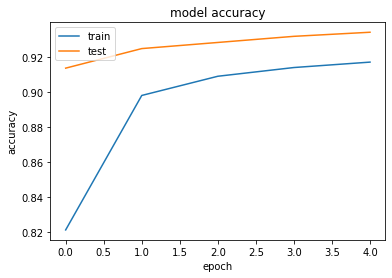

In [53]:
plot_accuracy_convergence(history)

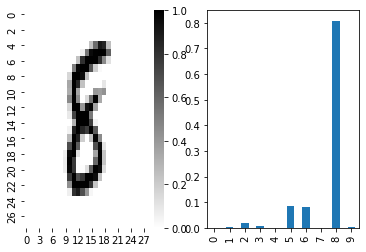

In [54]:
give_me_some_estimative()